### Title: datafun-o6-EDA
### Author: Molly Strickland, Denise Case, AI
### Date: 3 June to 9 June 2024
### Purpose of the project: Project 6 is an opportunity to create your own custom exploratory data analysis (EDA) project using GitHub, Git, Jupyter, pandas, Seaborn and other popular data analytics tools.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow
import notebook
import jupyterlab
import seahorse


Initial Data Acquisition

In [15]:
# Load the dataset into a pandas DataFrame - adjust this process for your custom data
df_taxis = sns.load_dataset('taxis')

# Inspect first 5 rows of the DataFrame
print(df_taxis.head(5))

# Export the dataset to a CSV file
df_taxis.to_csv('taxis_dataset.csv', index=False)

print("Dataset exported to 'taxis_dataset.csv'")


               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

# Initial Data Inspection

In [16]:

print(df_taxis.head(10))
print(df_taxis.shape)
print(df_taxis.dtypes)

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   
5 2019-03-11 10:37:23 2019-03-11 10:47:31           1      0.49   7.5  2.16   
6 2019-03-26 21:07:31 2019-03-26 21:17:29           1      3.65  13.0  2.00   
7 2019-03-22 12:47:13 2019-03-22 12:58:17           0      1.40   8.5  0.00   
8 2019-03-23 11:48:50 2019-03-23 12:06:14           1      3.63  15.0  1.00   
9 2019-03-08 16:18:37 2019-03-08 16:26:57           1      1.52   8.0  1.00   

   tolls  total   color      payment                pickup_zone  \
0    0.0  12.95  yellow  credit card            Lenox Hill West

Initial Descriptive Statistics

In [17]:
print(df_taxis.describe())



                              pickup                        dropoff  \
count                           6433                           6433   
mean   2019-03-16 08:31:28.514223616  2019-03-16 08:45:49.491217408   
min              2019-02-28 23:29:03            2019-02-28 23:32:35   
25%              2019-03-08 15:50:34            2019-03-08 16:12:51   
50%              2019-03-15 21:46:58            2019-03-15 22:06:44   
75%              2019-03-23 17:41:38            2019-03-23 17:51:56   
max              2019-03-31 23:43:45            2019-04-01 00:13:58   
std                              NaN                            NaN   

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.00000

# Step 4. Initial Data Distribution for Numerical Columns

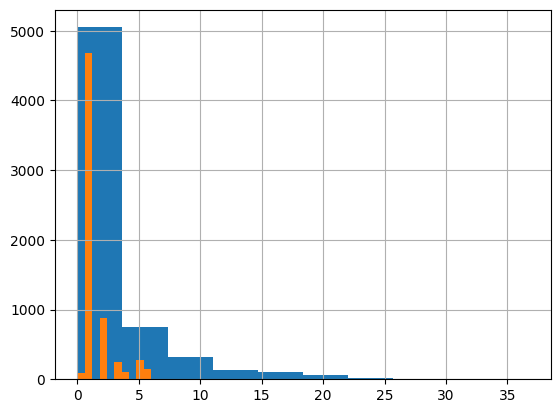

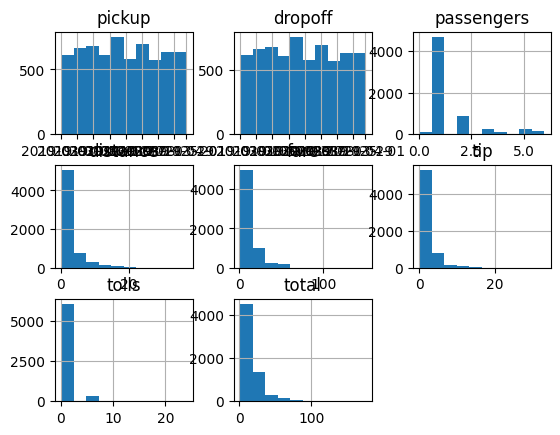

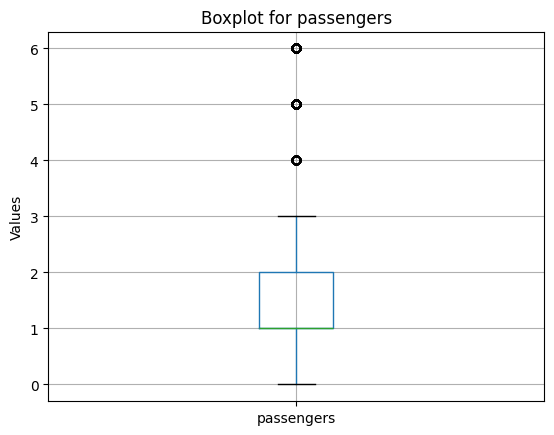

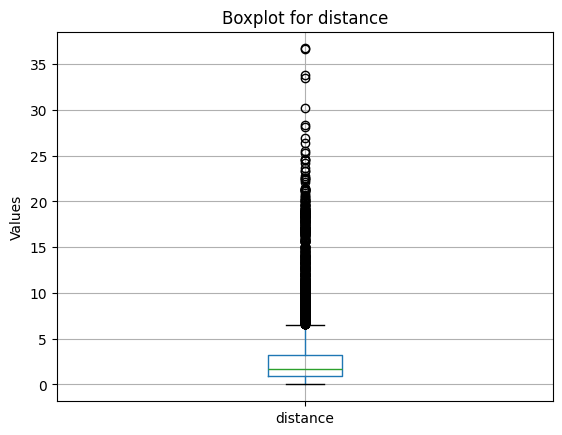

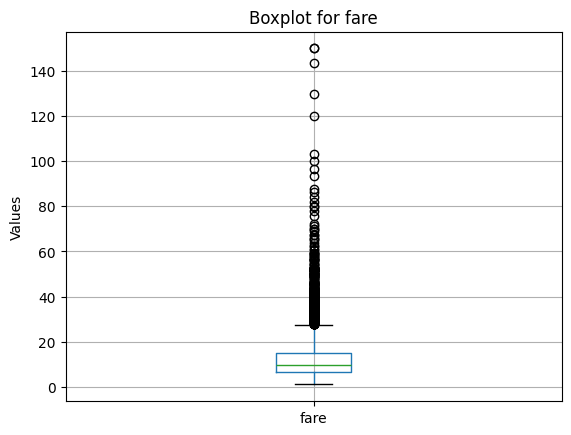

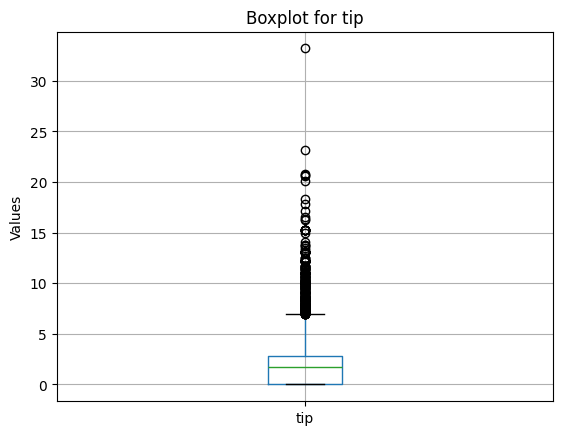

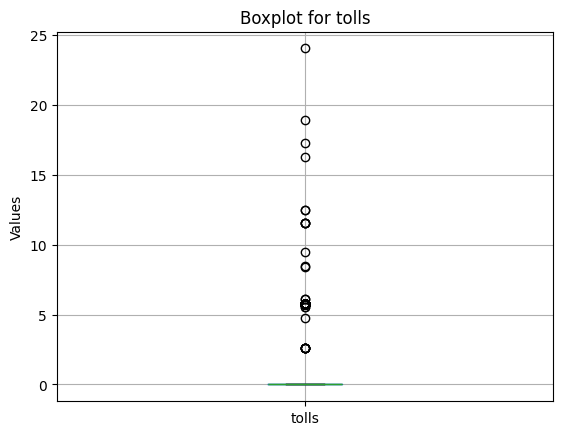

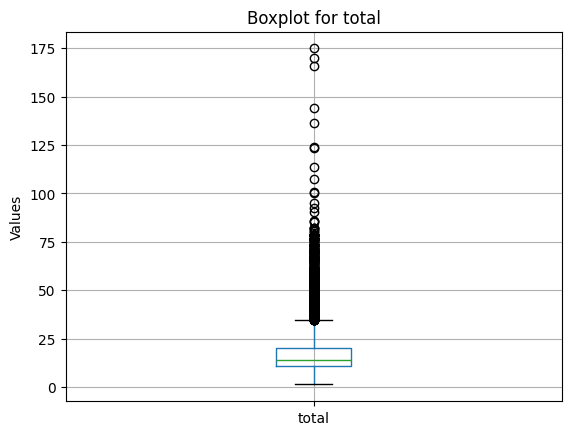

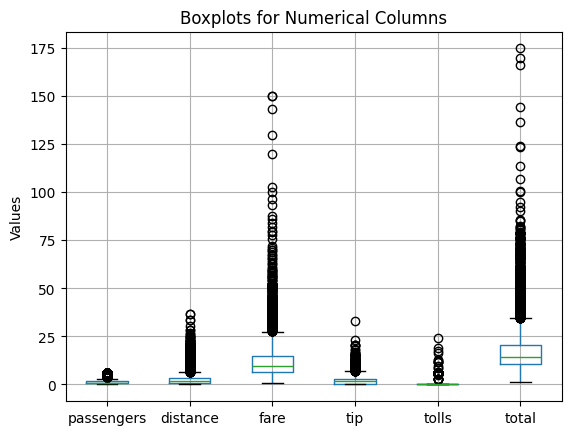

In [18]:
# Inspect histogram by numerical column
df_taxis['distance'].hist()
df_taxis['passengers'].hist()

# Inspect histograms for all numerical columns
df_taxis.hist()

# Show all plots
plt.show()


# Iterate over numerical columns and display boxplots
for column in df_taxis.select_dtypes(include='number').columns:
    df_taxis[[column]].boxplot()
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Values')
    plt.show()


# Display boxplots for each numerical column
df_taxis.boxplot()
plt.title('Boxplots for Numerical Columns')
plt.ylabel('Values')
plt.show()


Step 5. Initial Data Distribution for Categorical Columns

Value counts for column 'color':
color
yellow    5451
green      982
Name: count, dtype: int64

Value counts for column 'payment':
payment
credit card    4577
cash           1812
Name: count, dtype: int64

Value counts for column 'pickup_zone':
pickup_zone
Midtown Center                         230
Upper East Side South                  211
Penn Station/Madison Sq West           210
Clinton East                           208
Midtown East                           198
                                      ... 
Homecrest                                1
Bedford Park                             1
Riverdale/North Riverdale/Fieldston      1
Hollis                                   1
Hillcrest/Pomonok                        1
Name: count, Length: 194, dtype: int64

Value counts for column 'dropoff_zone':
dropoff_zone
Upper East Side North        245
Murray Hill                  220
Midtown Center               215
Upper East Side South        177
Midtown East                 176
            

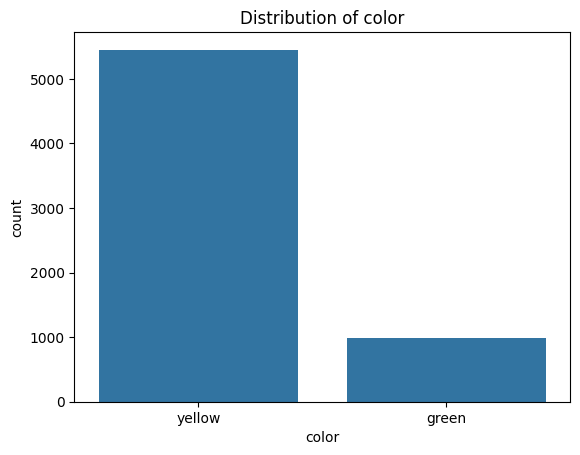

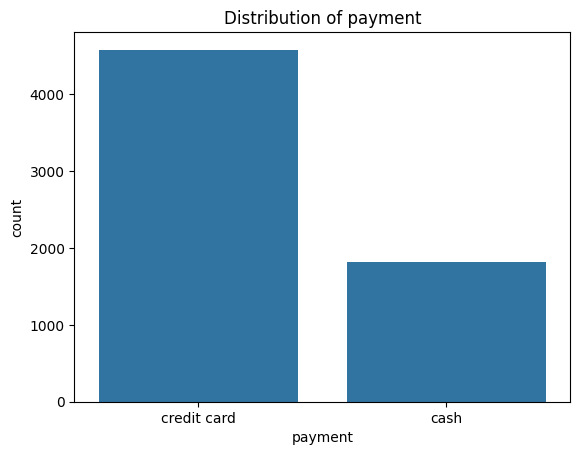

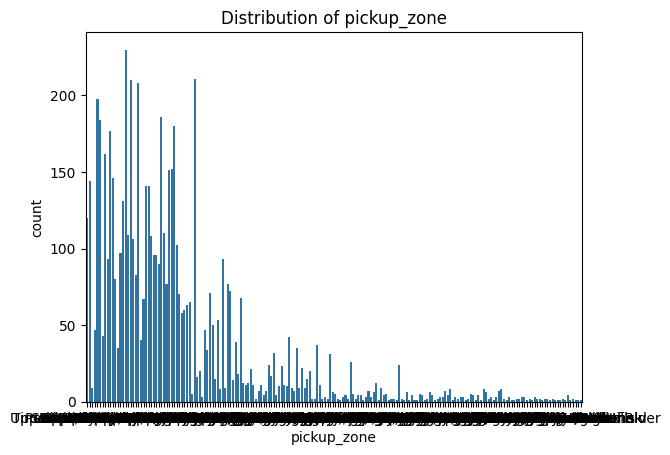

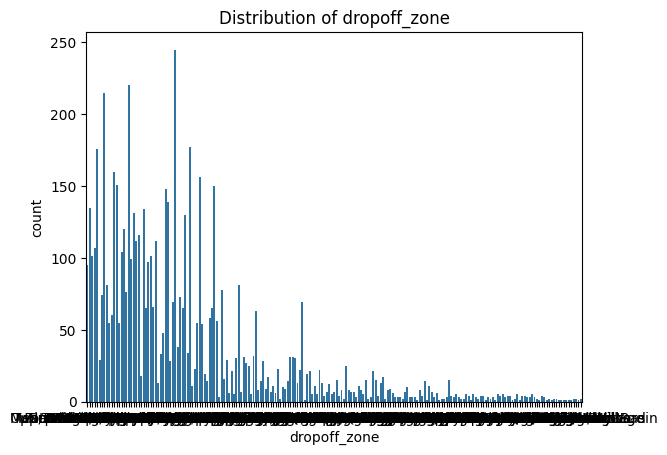

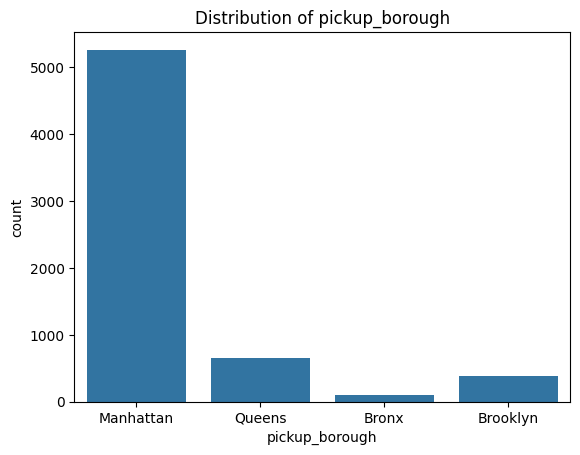

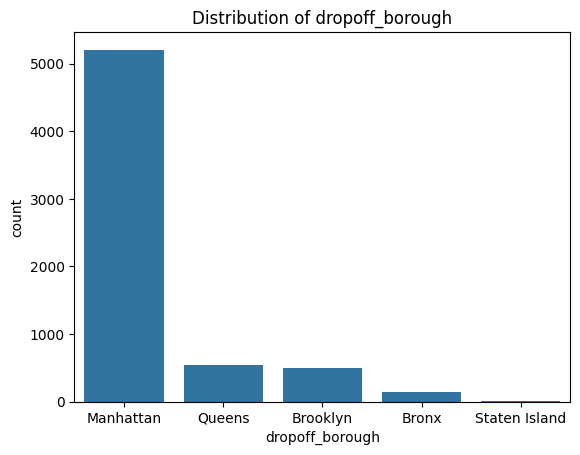

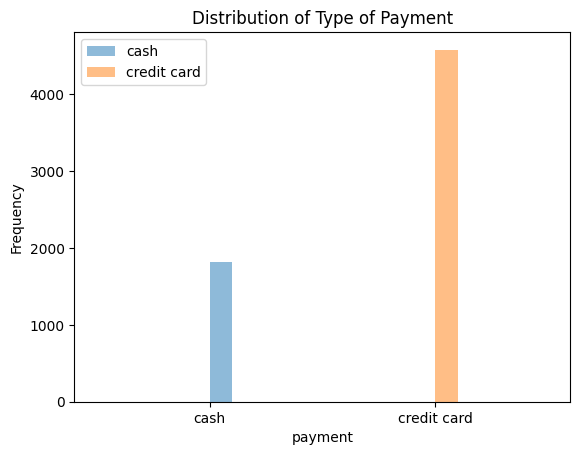

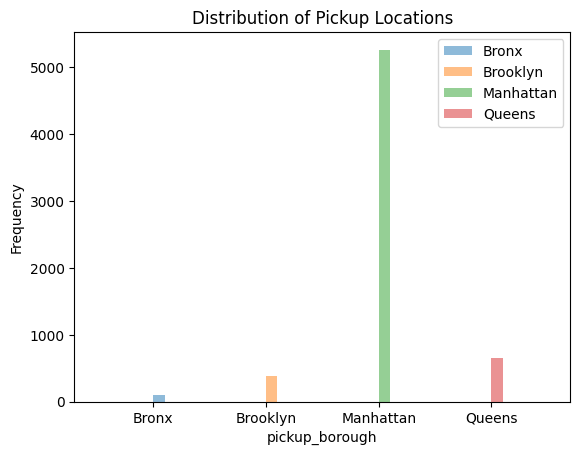

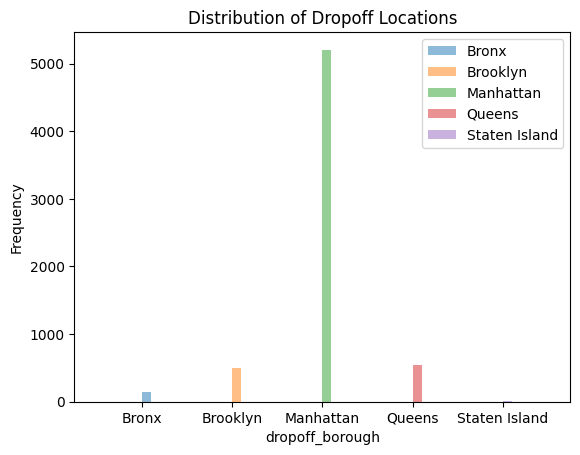

In [19]:
# Inspect value counts by categorical column
for column in df_taxis.columns:
    # Check if the column contains categorical data
    if df_taxis[column].dtype == 'object':
        # Display value counts for categorical columns
        print(f"Value counts for column '{column}':")
        print(df_taxis[column].value_counts())
        print()

# Inspect value counts for all categorical columns
for col in df_taxis.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df_taxis)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()




#Create readable histograms of categorical data
### Create a histogram of payment types
# Group by 'Payment' and plot histograms
for payment, group_data in df_taxis.groupby('payment'):
    plt.hist(group_data['payment'], alpha=0.5, label=payment)

# Add labels and legend
plt.xlabel('payment')
plt.ylabel('Frequency')
plt.title('Distribution of Type of Payment')
plt.legend()

# Show plot
plt.show()


### Create a histogram of Pickup Locations
# Group by 'pickup_borough' and plot histograms
for pickup_borough, group_data in df_taxis.groupby('pickup_borough'):
    plt.hist(group_data['pickup_borough'], alpha=0.5, label=pickup_borough)

# Add labels and legend
plt.xlabel('pickup_borough')
plt.ylabel('Frequency')
plt.title('Distribution of Pickup Locations')
plt.legend()

# Show plot
plt.show()



### Create a histogram of Dropoff Locations
# Group by 'dropoff_borough' and plot histograms
for dropoff_borough, group_data in df_taxis.groupby('dropoff_borough'):
    plt.hist(group_data['dropoff_borough'], alpha=0.5, label=dropoff_borough)

# Add labels and legend
plt.xlabel('dropoff_borough')
plt.ylabel('Frequency')
plt.title('Distribution of Dropoff Locations')
plt.legend()

# Show plot
plt.show()

Credit Cards are used more than twice as often as cash payments
Majority of all transactions occur in Manhattan
All taxis are yellow or green
